<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/KMeans_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means and agglomerative clustersing

Clustering divides data into clusters that are meaningful to your analysis. Meaningful groups are found when the cluster capture the "natural structure of the data" [1].

K-means is an unsepervised classification method. The goal of clustering is to group data points that are similar to each and **and** different from data points in other groups. The clusters are basically labels for the data points within each of them. If a group of data points is in cluster 1, then they are distinct from data points in cluster 2 adn cluster 3. 

Much of this introduction is source from [here](https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187). 

References: 

[1] Steinbach, M., Kumar, V., & Tan, P. (2005). Cluster analysis: Basic concepts and algorithms. Introduction to Data Mining, 1st Edn. Pearson Addison Wesley.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

#getting the Iris dartaset from sklearn
#see details here: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
iris = datasets.load_iris()


In [2]:
#these are the packages we use when plotting figures using Pandas DataFrames in a notebook. 
#check the introduction to Pandas for details (https://github.com/tawfiqam/MI564/blob/main/Pandas_Introduction.ipynb)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(10,8)})

K-means chooses K initial centroids randomly. Each data point is then assigned to the closest centroid. The centroid is then updated based on the elements assigned to the cluster. 

How do we asses what close means? Consider that if our data is plotted, then we can think of the "distance" between data points as the euclidian distance between them on the graph. 

We can use the sum of squared error (SSE) as the error (also known as scatter) of the data. Turns out that the centroid that minimizes the SSE of the cluster is the mean. If you want to see more details, check out [1:Page 500].

For example, if we had 3 points on a graph at (1,1), (2,3), and (6,2), then the centroid should be (3,2) ==> ((1+2+6)/3),((1+3+2)/3)

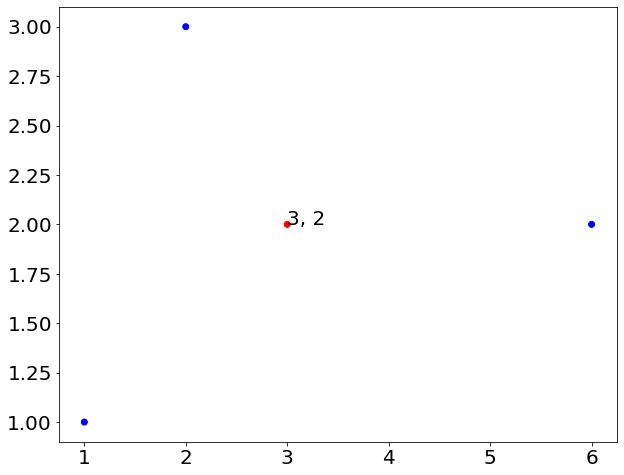

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

colors = ["blue", "red"]
X = [1,2,6,3]
Y = [1,3,2,2]

color_indices = [0, 0, 0, 1]

colormap = matplotlib.colors.ListedColormap(colors)

plt.scatter(X, Y,c=color_indices, cmap=colormap)

for x, y in zip(X,Y):
    text = str(x) + ', ' + str(y)

plt.text(x, y, text)
plt.show()

##Back to the Iris dataset!

Let's explore the Iris dataset. There's a data portion that includes 4 featuers. 

In [4]:
print(iris['data'][0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


The four features are...

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The target is basically describing three different types of flowers: Iris setosa, Iris virginica and Iris versicolor

In [6]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Since we always like to work with Pandas DataFrames, let's set one up using this dataset

In [7]:
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Because we want to make the names of the columns easier for us (not to have to add the spaces and the "cm," let's rename our columns...

In [9]:
df.rename(columns={'sepal length (cm)':'sepal_length','sepal width (cm)':'sepal_width','petal length (cm)':'petal_length','petal width (cm)':'petal_width'}, inplace=True)

Let's create a scatterplot with sepal length on the x-axis and sepal width on the y-axis. Let's color the different types of flowers to make things clearer. Do you see any patterns here? 

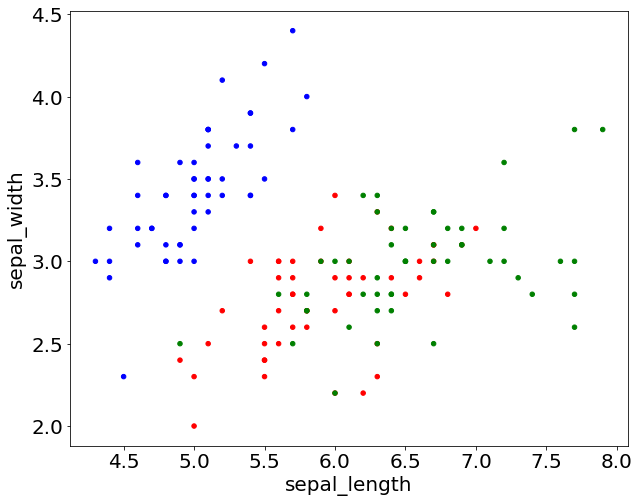

In [10]:
col = df.target.map({0.0:'b', 1.0:'r', 2.0:'g'})
df.plot.scatter(x='sepal_length',y='sepal_width',c=col)

##Enter K-means clustering

OK. Let's try this for the first time, with a K (number of clusters) = 5.

In [11]:
x = df[df.columns[:-1]].values
kmeans5 = KMeans(n_clusters=5)
y_kneas5 = kmeans5.fit(x)
print(y_kneas5.cluster_centers_)

[[6.20769231 2.85384615 4.74615385 1.56410256]
 [5.006      3.428      1.462      0.246     ]
 [5.508      2.6        3.908      1.204     ]
 [7.475      3.125      6.3        2.05      ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]]


In [12]:
k_means_test = y_kneas5.predict(x)
print(k_means_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 0 0 2 0 2 2 0 2 0 2 0 0 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 4 0 3 4 4 3 2 3 4 3 4
 4 4 0 4 4 4 3 3 0 4 0 3 0 4 3 0 0 4 3 3 3 4 0 0 3 4 4 0 4 4 4 0 4 4 4 0 4
 4 0]


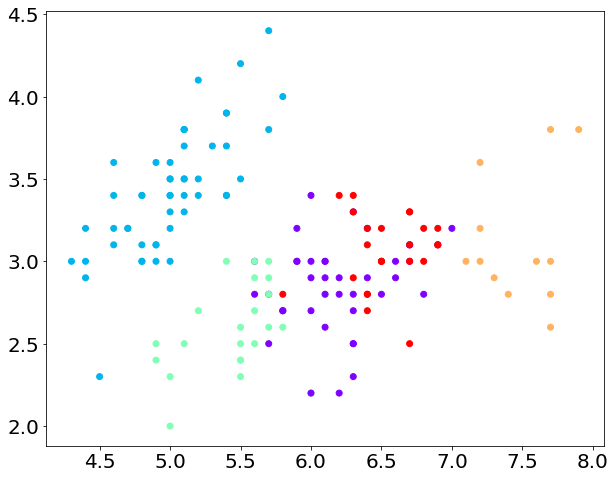

In [13]:
plt.scatter(x[:,0],x[:,1],c=k_means_test, cmap='rainbow')

The graph above does not really make sense given that we know we have three  different types of flowers: Iris setosa, Iris virginica and Iris versicolor, 
it makes more sense that we should have 3 centroids (clusters), each corresponding to one of the three flower types. See the discussion of meaningful clusters on the top of this notebook.

Alright, so, how do we find the best K (number of centroids) if we don't know as much about the dataset?


##Finding the best number of clusters (centroids),K: The Elbow Method

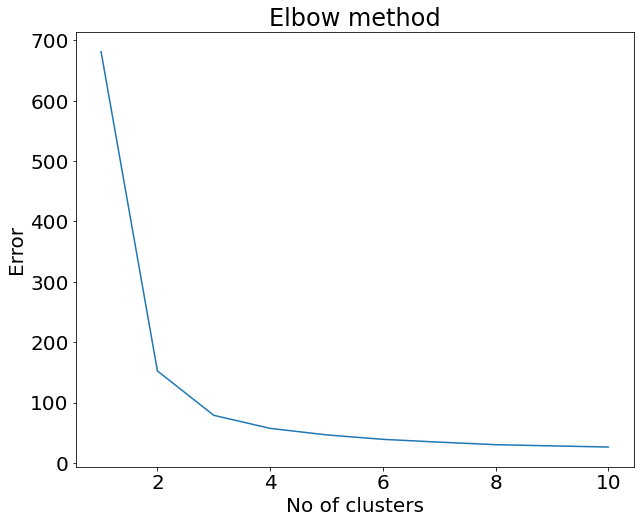

In [14]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    #inertia_float:Sum of squared distances of samples to their closest cluster center
    #remember the explanation of K-means as the average between the points
    #the lower the error, the better
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

As you can see in the graph above, the "elbow" can be seen around 3! OK. Let's change our k from 5 ro 3:

In [15]:
x = df[df.columns[:-1]].values
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit(x)
print(y_kmeans3.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [16]:
k_means_test = y_kmeans3.predict(x)
print(k_means_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


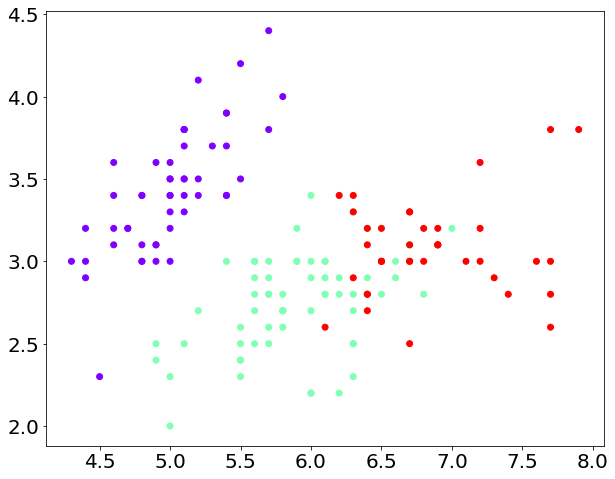

In [17]:
#[ : , 0 ] means (more or less) [ first_row:last_row , column_0 ]. If you have a 2-dimensional list/matrix/array, this notation will give you all the values in column 0 (from all rows)
plt.scatter(x[:,0],x[:,1],c=k_means_test, cmap='rainbow')

##Agglomerative Hierarchical Clustering

Agglomerative clustering starts with the points as individual clusters, and step by step merges the closest clusters. 

This cluster usually visualized with a "tree-like" dendogram. [1:P.515]

Ward's method (see dendogram below) assumes each cluster is represented by its centroid, and measures the proximity between any two clusters by the increase in SSE (see above) resulting from merging two clusters represented by their respective centroids. [1:P.517]

Check more from [this example](https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019).

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

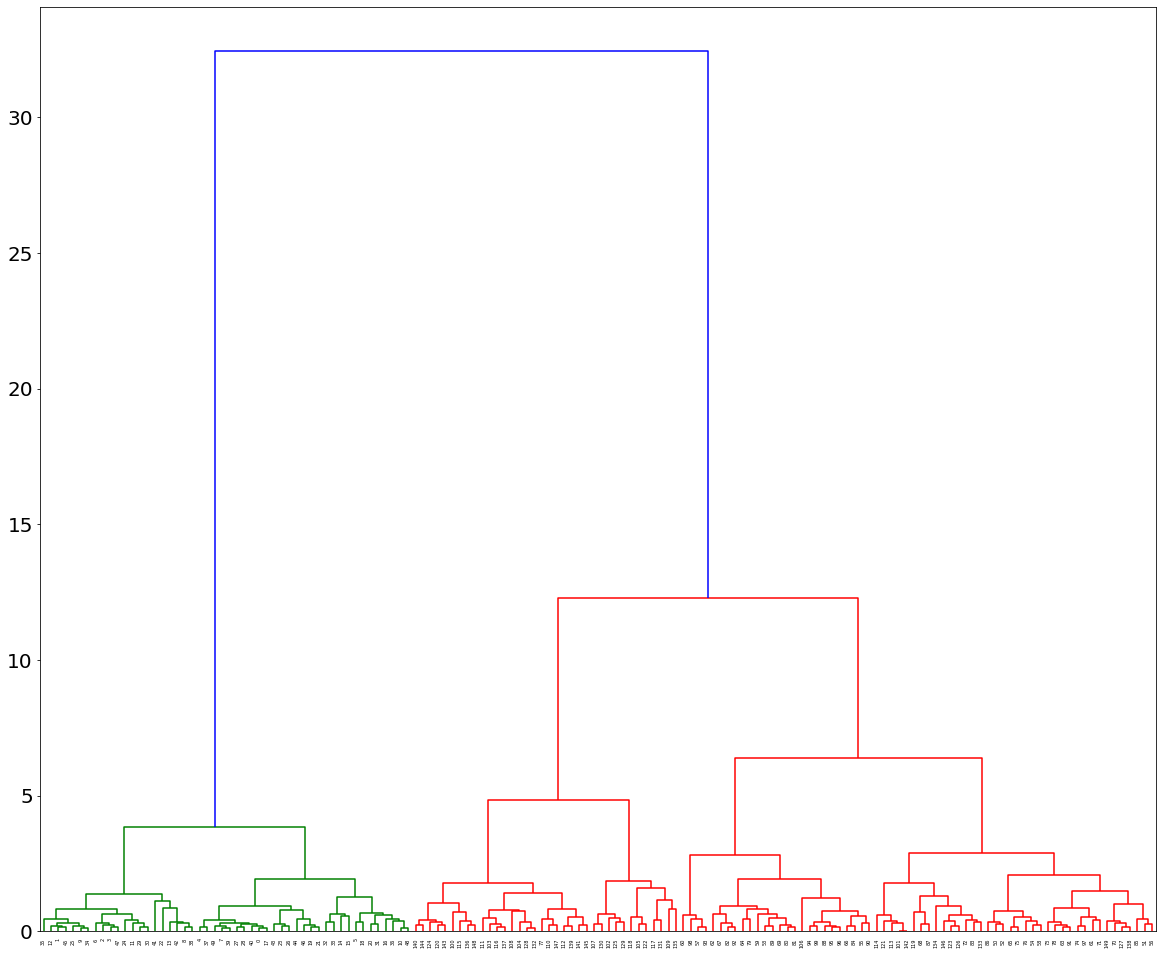

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

clustering = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
clustering.fit(x)
clustering_class = clustering.fit_predict(x)

display(clustering_class)
labels = clustering.labels_

plt.figure(figsize=(20,17))
dend = sch.dendrogram(sch.linkage(x, method='ward'))
plt.show()

We can also plot the resulting cluster to see what it looks like.

Compare this to our earlier analysis using K-means. 

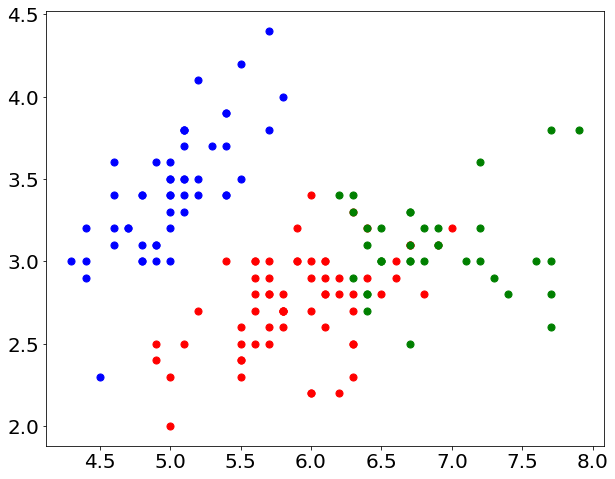

In [19]:
plt.scatter(x[labels==0, 0], x[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(x[labels==2, 0], x[labels==2, 1], s=50, marker='o', color='green')